In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import time
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

# input_path = 'C:\\Users\\user\\Desktop\\Somma New Dataset\\ADS-ML-1002\\1.Input\\'
output_path = 'C:\\Users\\sangy\\Desktop\\PythonWorkspace\\잡잡\\KISA\\'
# model_path = output_path+"220826_model_.h5"
# model_path = output_path+"TEST_220821_model_test_2.h5"

train_file_name = test_file_name = 'total_data_1040features'


In [2]:
df = pd.read_csv(output_path+train_file_name+'.csv')

In [ ]:
df_value = df.iloc[:,1:]

In [ ]:
X_data = df_value

total_median_data = X_data.copy()
for i in X_data.columns:
    total_median_data[i] = total_median_data[i].fillna(total_median_data[i].median())

In [7]:
eps = 3
min_samples = 10

model = DBSCAN(eps= eps, min_samples=10)

model.fit(total_median_data)

total_median_data['cluster'] = model.fit_predict(total_median_data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

feature_num=len(total_median_data.columns)

raw_data = total_median_data.values
data = raw_data[:, :]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_data,columns=total_median_data.columns)
total_median_data = scaled_data

In [9]:
df_scale = total_median_data

# 클러스터 개수 확인
print("## DBSCAN Parameters ##")
print("EPS : "+str(eps))
print("Min_Samples : "+str(min_samples))
print("")

Cluster_num = df_scale['cluster'].unique()

print("Cluster_num : "+str(Cluster_num))
cluster = df_scale['cluster']
temp = np.zeros(len(Cluster_num))

for i in cluster:
    for j in Cluster_num:
        if i == j:
            temp[j+1] +=1
            
for i in Cluster_num:
    print("Cluster_"+str(i)+" : "+str(int(temp[i+1])))

## DBSCAN Parameters ##
EPS : 3
Min_Samples : 10

Cluster_num : [ 0 -1  3  1  2 13 16  4  5  6  9  7  8 10 11 12 14 15 19 17 18 20 21 22
 23 24 25 26 27 28 29 30]
Cluster_0 : 1868
Cluster_-1 : 1900
Cluster_3 : 10
Cluster_1 : 16
Cluster_2 : 13
Cluster_13 : 15
Cluster_16 : 29
Cluster_4 : 25
Cluster_5 : 470
Cluster_6 : 18
Cluster_9 : 23
Cluster_7 : 16
Cluster_8 : 22
Cluster_10 : 58
Cluster_11 : 12
Cluster_12 : 11
Cluster_14 : 13
Cluster_15 : 35
Cluster_19 : 19
Cluster_17 : 20
Cluster_18 : 25
Cluster_20 : 18
Cluster_21 : 14
Cluster_22 : 12
Cluster_23 : 13
Cluster_24 : 12
Cluster_25 : 11
Cluster_26 : 14
Cluster_27 : 11
Cluster_28 : 10
Cluster_29 : 11
Cluster_30 : 11


In [10]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# 데이터 불러오기
data = df_scale.iloc[:,:-1]

# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
t_model = TSNE(n_components=n_components)

# 학습한 결과 2차원 공간 값 출력
Tsne_data = t_model.fit_transform(data)

In [12]:
TSNE_DF = pd.DataFrame(Tsne_data, columns = ['TSNE component1', 'TSNE component2'])
TSNE_DF['cluster'] = model.fit_predict(df_scale)

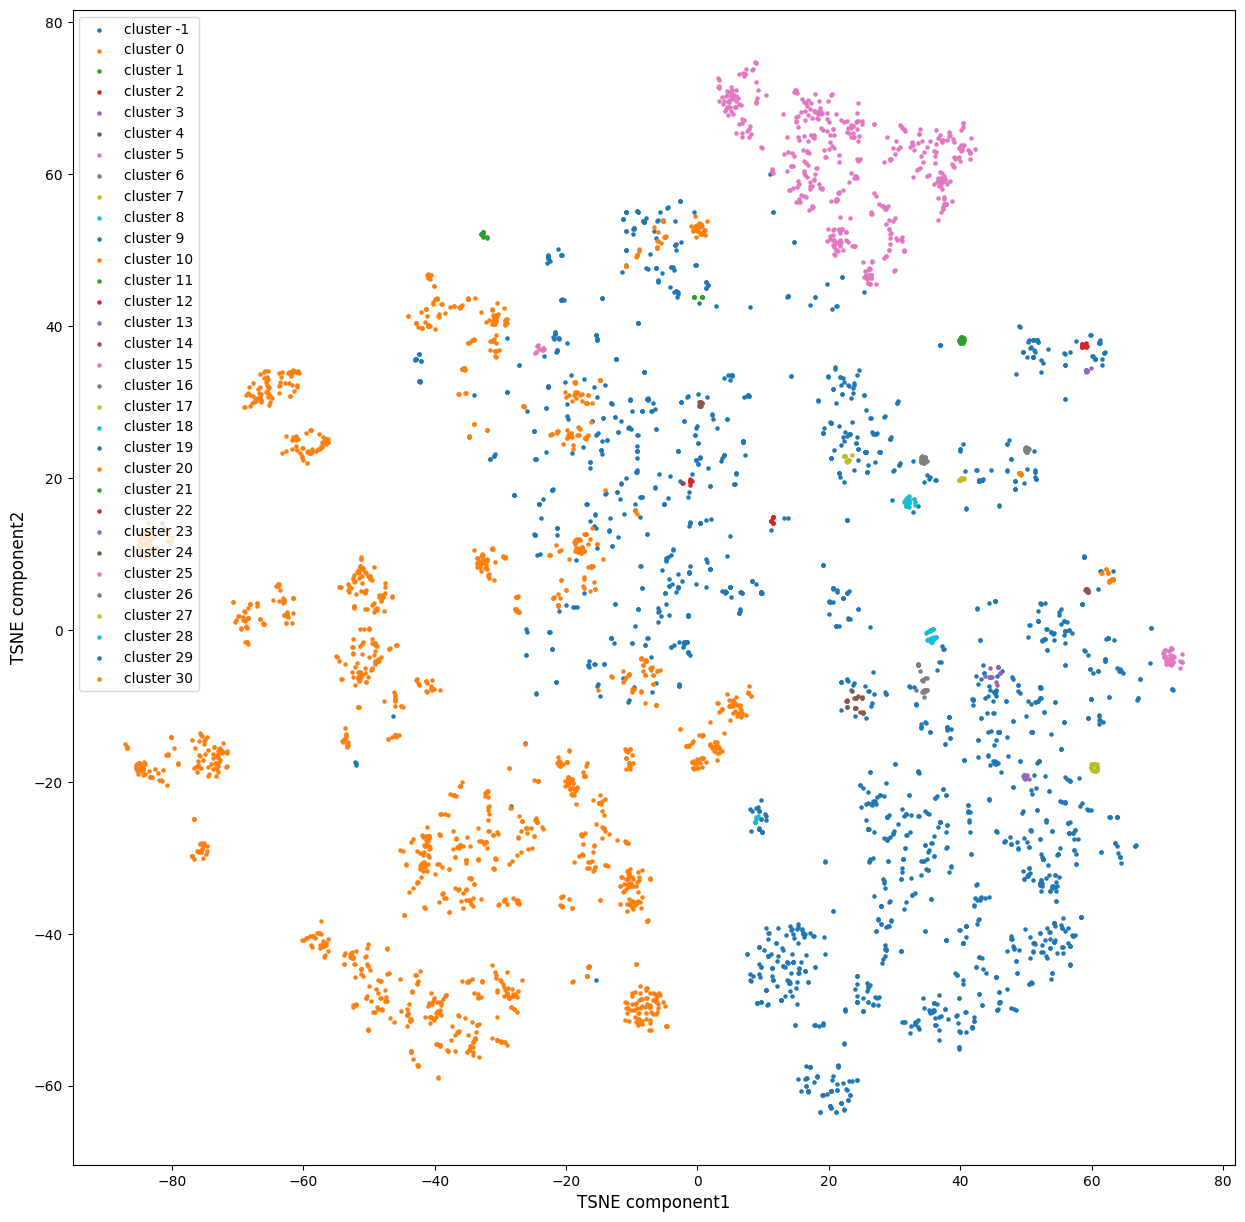

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

plt.figure(figsize = (15, 15))

for i in range(-1, TSNE_DF['cluster'].max()+1):
    plt.scatter(TSNE_DF.loc[TSNE_DF['cluster'] == i, 'TSNE component1'], TSNE_DF.loc[TSNE_DF['cluster'] == i, 'TSNE component2'], 
                    label = 'cluster ' + str(i), s = 5)
    
# plt.scatter(TSNE_DF.loc[TSNE_DF['cluster'] == -1, 'TSNE component1'], TSNE_DF.loc[TSNE_DF['cluster'] == -1, 'TSNE component2'], 
#                     label = 'Nearest Anomaly', s = 5, color = 'red')

    
plt.legend()
# plt.title("T-SNE :: eps = "+str(eps)+', min_samples = '+str(min_samples), size = 15)
plt.xlabel('TSNE component1', size = 12)
plt.ylabel('TSNE component2', size = 12)
plt.show()
# plt.savefig('Normal.png', dpi=200)